# Dimension reduction and feature extraction

## Principal Component Analysis

### Implement PCA

- Write a class `BasicPCA` with two methods `fit(X)` that estimates the data mean and principal components directions. `transform(X)` that project a new the data into the principal components.

- Check that your `BasicPCA` performed similarly to the one from sklearn:
`from sklearn.decomposition import PCA`

In [22]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#%matplotlib qt

np.random.seed(42)


import numpy as np
from sklearn.decomposition import PCA


class BasicPCA():
    def fit(self, X):
        # U : Unitary matrix having left singular vectors as columns.
        #     Of shape (n_samples,n_samples) or (n_samples,n_comps), depending on
        #     full_matrices.
        #
        # s : The singular values, sorted in non-increasing order. Of shape (n_comps,), 
        #     with n_comps = min(n_samples, n_features).
        #
        # Vh: Unitary matrix having right singular vectors as rows. 
        #     Of shape (n_features, n_features) or (n_comps, n_features) depending on full_matrices.
        self.mean = X.mean(axis=0)
        Xc = X - self.mean  # Centering is required
        U, s, V = scipy.linalg.svd(Xc, full_matrices=False)
        self.explained_variance_ = (s ** 2) / X.shape[0]
        self.explained_variance_ratio_ = (self.explained_variance_ /
                                 self.explained_variance_.sum())
        self.princ_comp_dir = V

    def transform(self, X):
        Xc = X - self.mean
        return(np.dot(Xc, self.princ_comp_dir.T))

# test
np.random.seed(42)
 
# dataset
n_samples = 100
experience = np.random.normal(size=n_samples)
salary = 1500 + experience + np.random.normal(size=n_samples, scale=.5)
X = np.column_stack([experience, salary])

X = np.column_stack([experience, salary])
pca = PCA(n_components=2)
pca.fit(X)

basic_pca = BasicPCA()
basic_pca.fit(X)

print(pca.explained_variance_ratio_)
assert np.all(basic_pca.transform(X) == pca.transform(X))


[ 0.93646607  0.06353393]


### Apply PCA on iris dataset

Apply your sklearn PCA on `iris` dataset available at: 'https://raw.github.com/neurospin/pystatsml/master/data/iris.csv'.

In [12]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
# https://tgmstat.wordpress.com/2013/11/28/computing-and-visualizing-pca-in-r/

import pandas as pd

try:
    salary = pd.read_csv('data/iris.csv')
except:
    url = 'https://raw.github.com/neurospin/pystatsml/master/data/iris.csv'
    df = pd.read_csv(url)

Describe the data set. Should the dataset been standardized ?

In [13]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Describe the structure of correlation among variables.

In [14]:
X = np.array(df.ix[:, :4])
np.around(np.corrcoef(X.T), 3)

array([[ 1.   , -0.118,  0.872,  0.818],
       [-0.118,  1.   , -0.428, -0.366],
       [ 0.872, -0.428,  1.   ,  0.963],
       [ 0.818, -0.366,  0.963,  1.   ]])

In [15]:
# Center and standardize

X = np.array(df.ix[:, :4])
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0, ddof=1)
np.around(np.corrcoef(X.T), 3)

array([[ 1.   , -0.118,  0.872,  0.818],
       [-0.118,  1.   , -0.428, -0.366],
       [ 0.872, -0.428,  1.   ,  0.963],
       [ 0.818, -0.366,  0.963,  1.   ]])

Compute a PCA with the maximum number of components.

In [16]:
pca = PCA(n_components=X.shape[1])
pca.fit(X)

PCA(copy=True, n_components=4, whiten=False)

Retrieve the explained variance ratio. Determine $K$ the number of components.

In [17]:
print(pca.explained_variance_ratio_)

K = 2
pca = PCA(n_components=X.shape[1])
pca.fit(X)
PC = pca.transform(X)
#print(PC)

[ 0.72962445  0.22850762  0.03668922  0.00517871]


Print the $K$ principal components direction and correlation of the $K$ principal
components with original variables. Interpret the contribution of original variables
into the PC.


In [18]:
print(pca.components_)
CorPC = pd.DataFrame(
    [[np.corrcoef(X[:, j], PC[:, k])[0, 1] for j in range(X.shape[1])]
        for k in range(K)],
            columns = df.columns[:4],
    index = ["PC %i"%k for k in range(K)]
)

print(CorPC)

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [ 0.26128628 -0.12350962 -0.80144925  0.52359713]]
      sepal_length  sepal_width  petal_length  petal_width
PC 0      0.890169    -0.460143      0.991555     0.964979
PC 1     -0.360830    -0.882716     -0.023415    -0.064000


Plot samples projected into the $K$ first PCs. Color samples with their species.

['setosa' 'versicolor' 'virginica']


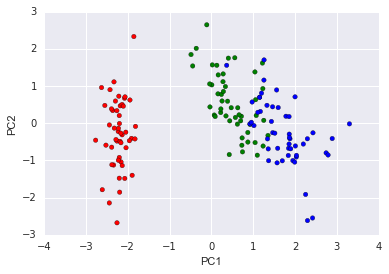

In [19]:
colors = {'setosa':'r', 'versicolor':'g', 'virginica':'blue'}
print(df["species"].unique())
#plt.scatter(df['experience'], df['salary'], c=df['education'].apply(lambda x: colors[x]), s=100)
plt.scatter(PC[:, 0], PC[:, 1], c=df["species"].apply(lambda x: colors[x]))
plt.xlabel("PC1")
plt.ylabel("PC2")

Pairewise plot

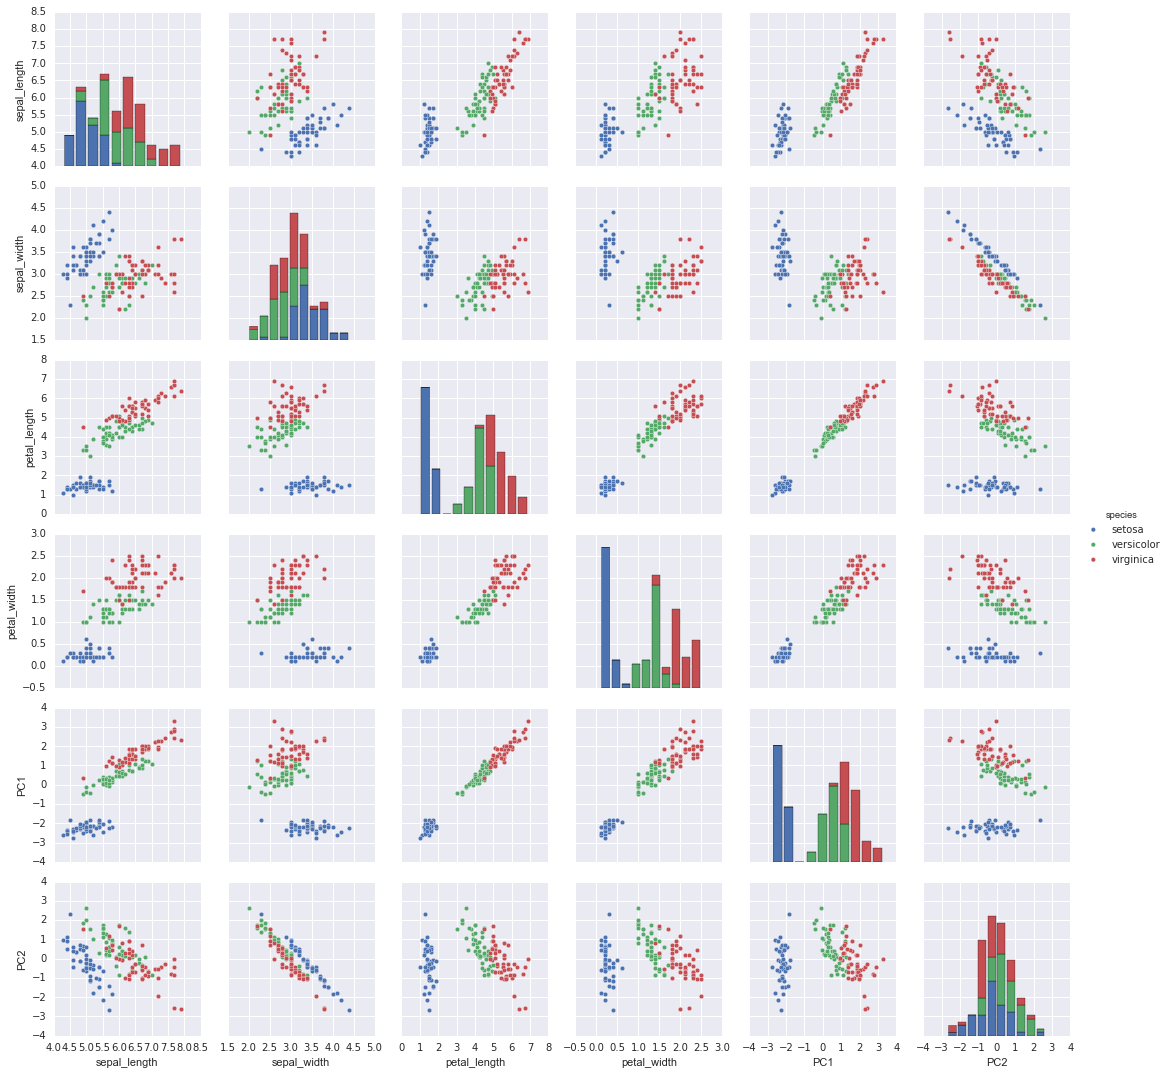

In [20]:
df["PC1"] = PC[:, 0]
df["PC2"] = PC[:, 1]

sns.pairplot(df, hue="species")

## MDS

Stress [14143.592281577477, 233.38619784318038, 5.2254188487252371, 0.79600194624479215]
Correlation between PCA and MDS
[0.99849440705607062, 0.98619187375452111]


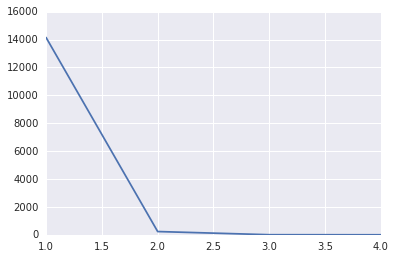

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
%matplotlib inline

# https://tgmstat.wordpress.com/2013/11/28/computing-and-visualizing-pca-in-r/

import pandas as pd

try:
    salary = pd.read_csv('data/iris.csv')
except:
    url = 'https://raw.github.com/neurospin/pystatsml/master/data/iris.csv'
    df = pd.read_csv(url)

X = np.asarray(df.ix[:, :4])
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0, ddof=1)

from sklearn import metrics
D = metrics.pairwise.pairwise_distances(X, metric='euclidean')


stress = [MDS(dissimilarity='precomputed', n_components=k,
           random_state=42, max_iter=300, eps=1e-9).fit(D).stress_ for k in range(1, X.shape[1]+1)]

print("Stress", stress)
plt.plot(range(1, 5), stress)

K = 2
mds = MDS(dissimilarity='precomputed', n_components=K,
           random_state=42, max_iter=300, eps=1e-9)
Xmds = mds.fit_transform(D)

pca = PCA(n_components=K)
pca.fit(X)
PC = pca.transform(X)

print("Correlation between PCA and MDS")
cor = [np.corrcoef(Xmds[:, j], PC[:, j])[0, 1] for j in range(min(Xmds.shape[1], PC.shape[1]))]
print(cor)